In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.Chem import rdmolops
import seaborn as sns

In [14]:
active_df = pd.read_csv("kinase/mapk2/actives_final.ism",header=None,sep=" ")
active_rows,active_cols = active_df.shape
active_df.columns = ["SMILES","ID","ChEMBL_ID"]
active_df["label"] = ["Active"]*active_rows
PandasTools.AddMoleculeColumnToFrame(active_df,"SMILES","Mol")

In [15]:
def add_property_columns_to_df(df_in):
    df_in["mw"] = [Descriptors.MolWt(mol) for mol in df_in.Mol]
    df_in["logP"] = [Descriptors.MolLogP(mol) for mol in df_in.Mol]
    df_in["charge"] = [rdmolops.GetFormalCharge(mol) for mol in df_in.Mol]

In [16]:
add_property_columns_to_df(active_df)

,SMILES,ID,ChEMBL_ID,label,Mol,mw,logP,charge
0,C[C@H]4CNc2c(sc3ccc1ncccc1c23)C(=O)N4,557256,CHEMBL561334,Active,,283.356,2.99330,0
1,CC(C)(C)CN6CCC(NC(=O)c5csc(NC(=O)c4ccc3cc2C(=O...,436394,CHEMBL257834,Active,,548.713,4.21300,0
2,CC(C)(C)CN5CCC(NC(=O)c4csc(NC(=O)c3ccc2cc1C(=O...,436396,CHEMBL403154,Active,,536.702,4.06890,0
3,CN6CCC(NC(=O)c5csc(NC(=O)c4ccc3cc2C(=O)NCC1(CC...,436398,CHEMBL258045,Active,,492.605,2.79670,0
4,C[C@H]4CNc2c(sc3ccc1nc(Cl)ccc1c23)C(=O)N4,555529,CHEMBL556392,Active,,317.801,3.64670,0
...,...,...,...,...,...,...,...,...
96,Nc5nccc(Nc4cc(c2ccc1ccccc1c2)c3[nH]ncc3c4)n5,590185,CHEMBL589650,Active,,352.401,4.49890,0
97,CC3CNC(=O)c4[nH]c2ccc(C(=O)Nc1ccncc1)cc2c34,412026,CHEMBL247509,Active,,320.352,2.66210,0
98,CC3CNC(=O)c4[nH]c2ccc(C(=O)Nc1cccc(C#N)c1)cc2c34,412047,CHEMBL246910,Active,,344.374,3.13878,0
99,OCCCOc2cc1OCCCCCOc3nc(NC(=O)Nc1cc2Cl)cnc3C#N,370916,CHEMBL373598,Active,,447.879,3.34838,0

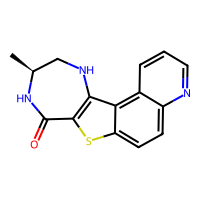
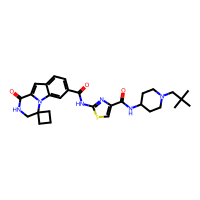
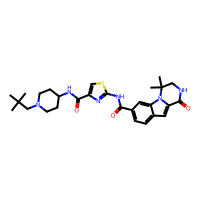
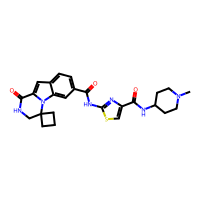
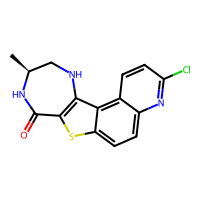
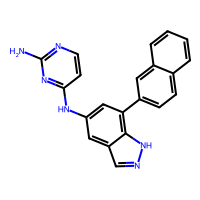
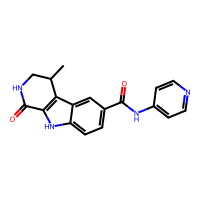
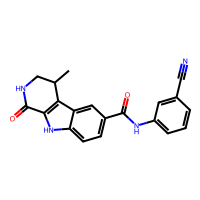
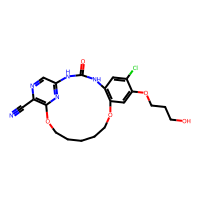
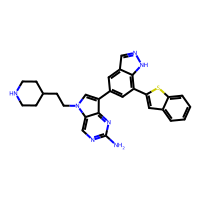

In [17]:
active_df